In [71]:
import pandas as pd 

df = pd.read_csv('./prepared/UNSW_network_train.csv')
df

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554285695,192.168.1.6,5353,224.0.0.251,5353,udp,dns,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
1,1554234781,fe80::a691:b1ff:fe1e:5790,135,ff02::1:ff56:fd62,136,icmp,-,1143.004906,3048,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554287761,fe80::343b:2cf:e9fb:6570,135,ff02::1:ff1e:5790,136,icmp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
3,1556438235,192.168.1.193,49363,192.168.1.37,8080,tcp,-,0.000124,0,0,...,0,0,-,-,-,-,-,-,1,backdoor
4,1556427410,192.168.1.33,45559,192.168.1.193,445,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,1,ransomware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106495,1556441863,192.168.1.193,49967,192.168.1.37,8080,tcp,-,0.000150,0,0,...,0,0,-,-,-,-,-,-,1,backdoor
106496,1556336415,192.168.1.195,51087,192.168.1.1,49152,tcp,http,0.005479,191,991,...,0,0,-,-,-,-,-,-,0,normal
106497,1556262126,192.168.1.190,14749,130.206.1.2,53,udp,dns,0.453330,46,105,...,0,0,-,-,-,-,-,-,0,normal
106498,1554310569,192.168.1.190,7878,192.168.1.190,43530,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106500 entries, 0 to 106499
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      106500 non-null  int64  
 1   src_ip                  106500 non-null  object 
 2   src_port                106500 non-null  int64  
 3   dst_ip                  106500 non-null  object 
 4   dst_port                106500 non-null  int64  
 5   proto                   106500 non-null  object 
 6   service                 106500 non-null  object 
 7   duration                106500 non-null  float64
 8   src_bytes               106500 non-null  int64  
 9   dst_bytes               106500 non-null  int64  
 10  conn_state              106500 non-null  object 
 11  missed_bytes            106500 non-null  int64  
 12  src_pkts                106500 non-null  int64  
 13  src_ip_bytes            106500 non-null  int64  
 14  dst_pkts            

In [50]:
import numpy as np 

numerics = df.select_dtypes(include = np.number)
numerics.describe()

,ts,src_port,dst_port,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code,label
count,1.065000e+05,106500.000000,106500.000000,106500.000000,1.065000e+05,1.065000e+05,1.065000e+05,106500.000000,1.065000e+05,106500.000000,1.065000e+05,106500.000000,106500.000000,106500.000000,106500.000000,1.065000e+05,106500.000000,106500.000000
mean,1.555620e+09,39220.831587,7755.718620,8.389778,8.646848e+04,8.431875e+04,1.341317e+04,6.283624,1.894574e+03,14.830141,2.673750e+03,133.737296,5.676000,0.082667,0.011662,3.361379e+01,0.121934,0.349418
std,9.473083e+05,18556.738423,13918.101328,386.148925,8.702699e+06,8.694663e+06,2.398927e+06,339.663235,1.764210e+05,1409.063222,2.791039e+05,2087.593468,28.038287,0.514945,3.805807,5.640294e+03,5.545274,0.476788
min,1.554198e+09,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.554294e+09,34296.000000,53.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,4.000000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,1.556204e+09,43530.000000,136.000000,0.000035,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,6.300000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,1.556327e+09,52734.250000,9197.000000,0.022808,5.500000e+01,2.340000e+02,0.000000e+00,2.000000,1.860000e+02,1.000000,3.490000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
max,1.556549e+09,65534.000000,65530.000000,85274.354600,1.250797e+09,1.251063e+09,6.068389e+08,75726.000000,4.736725e+07,313943.000000,8.639552e+07,32769.000000,255.000000,5.000000,1242.000000,1.048576e+06,404.000000,1.000000


In [51]:
categorical = df.select_dtypes(exclude = np.number)
categorical.describe()

,src_ip,dst_ip,proto,service,conn_state,dns_query,dns_AA,dns_RD,dns_RA,dns_rejected,...,http_method,http_uri,http_version,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,type
count,106500,106500,106500,106500,106500,106500,106500,106500,106500,106500,...,106500,106500,106500,106500,106500,106500,106500,106500,106500,106500
unique,2755,3336,3,10,13,7050,3,3,3,3,...,3,36,2,19,2,8,9,4,2,10
top,192.168.1.190,192.168.1.190,tcp,-,SF,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,normal
freq,17796,18468,65154,64869,28323,84703,84503,84503,84503,84503,...,106444,106444,106444,106444,106499,106458,106213,106324,106213,69287


<AxesSubplot:xlabel='label', ylabel='count'>

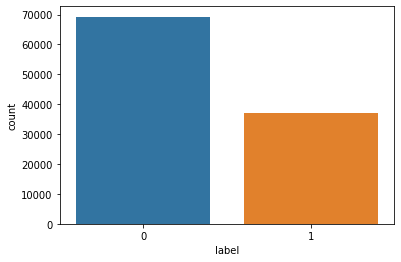

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of class labels is equivalent to the full dataset
sns.countplot(data = df, x = "label")

<AxesSubplot:xlabel='type', ylabel='count'>

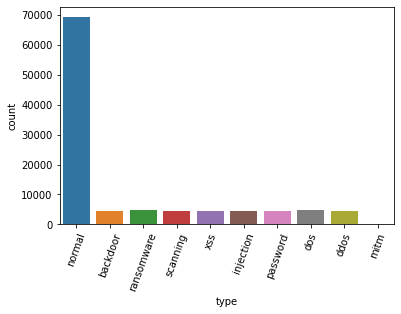

In [53]:
# As well as for each attack type
plt.xticks(rotation = 70)
sns.countplot(data = df, x = "type")

Text(0.5, 1.0, 'Network layer protocol')

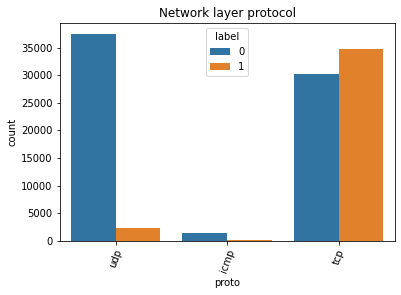

In [54]:
plt.xticks(rotation = 70)
ax = sns.countplot(data = df, x = "proto", hue = "label")
ax.set_title('Network layer protocol')

Text(0.5, 1.0, 'Service provided')

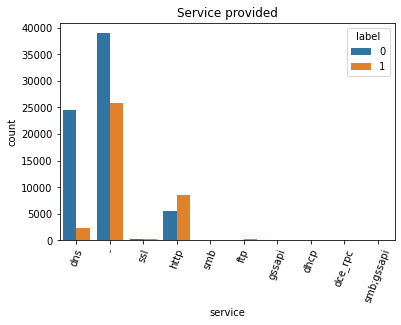

In [55]:
plt.xticks(rotation = 70)
ax = sns.countplot(data = df, x = "service", hue = "label")
ax.set_title("Service provided")

<AxesSubplot:xlabel='conn_state', ylabel='count'>

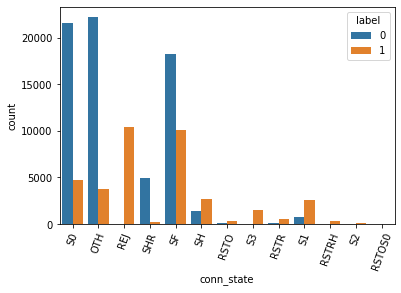

In [56]:
plt.xticks(rotation = 70)
sns.countplot(data = df, x = "conn_state", hue = "label")

Text(0.5, 1.0, "Pearson's correlation coefficient")

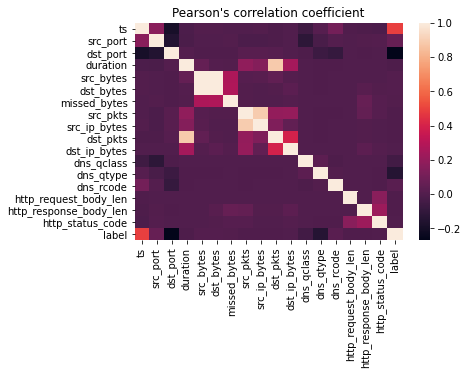

In [57]:
# Heatmap of linear correlation between numeric features
corr = numerics.corr(method = 'pearson')
ax = sns.heatmap(corr)
ax.set_title('Pearson\'s correlation coefficient')

Text(0.5, 1.0, "Spearman's rank correlation coefficient")

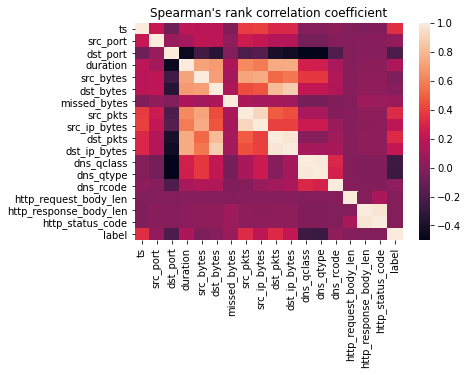

In [58]:
# And non-linear correlation
corr = numerics.corr(method = 'spearman')
ax = sns.heatmap(corr)
ax.set_title('Spearman\'s rank correlation coefficient')

In [59]:
# Look at dropping some low hanging fruit - textual based data
df['http_uri'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          2
/RenderingControl_1.xml                                                                                                                                                                                                                                                                                                                                                                                                                     

In [60]:
df['http_user_agent'].value_counts()

-                                                                                                                106444
Microsoft-Delivery-Optimization/10.0                                                                                 11
Ruby                                                                                                                  8
Microsoft-Windows/10.0 UPnP/1.0                                                                                       7
DAFUPnP                                                                                                               6
User-Agent: Microsoft-DLNA DLNADOC/1.50                                                                               5
Windows-Update-Agent/10.0.10011.16384 Client-Protocol/1.91                                                            4
Microsoft NCSI                                                                                                        2
hacking                                 

In [61]:
df['dns_query'].value_counts()

-                                                  84703
a2z3kk2ebqzso7.iot.ap-southeast-2.amazonaws.com     3143
_sleep-proxy._udp.local                              490
arpa.whois-servers.net                               482
desktop-7q9apbo                                      420
                                                   ...  
ns2.astrazeneca.com                                    1
219.125.in-addr.arpa                                   1
www.itsecgames.com                                     1
50.166.122.142.in-addr.arpa                            1
nic3.opera.com                                         1
Name: dns_query, Length: 7050, dtype: int64

In [62]:
df['http_orig_mime_types'].value_counts()

-                  106499
application/xml         1
Name: http_orig_mime_types, dtype: int64

In [63]:
df['http_resp_mime_types'].value_counts()

-                                    106458
application/xml                          14
text/html                                13
application/vnd.ms-cab-compressed         5
image/png                                 5
text/plain                                2
text/json                                 2
application/ocsp-response                 1
Name: http_resp_mime_types, dtype: int64

In [64]:
 # Drop the attack type column as we are performing binary classification
df = df.drop(['type'], axis = 1)
# Extract labels from the dataframe as a numpy array
y_train = df.pop("label").to_numpy()

# Drop TS, IP addresses and textual columns
DROP_COLUMNS = ['src_ip', 'dst_ip', 'ts', 'http_uri', 'http_user_agent', 'dns_query', 'http_resp_mime_types', 'http_orig_mime_types'] 

def drop_textual_features(X):
    X = X.drop(DROP_COLUMNS, axis = 1)
    return X

df = drop_textual_features(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106500 entries, 0 to 106499
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_port                106500 non-null  int64  
 1   dst_port                106500 non-null  int64  
 2   proto                   106500 non-null  object 
 3   service                 106500 non-null  object 
 4   duration                106500 non-null  float64
 5   src_bytes               106500 non-null  int64  
 6   dst_bytes               106500 non-null  int64  
 7   conn_state              106500 non-null  object 
 8   missed_bytes            106500 non-null  int64  
 9   src_pkts                106500 non-null  int64  
 10  src_ip_bytes            106500 non-null  int64  
 11  dst_pkts                106500 non-null  int64  
 12  dst_ip_bytes            106500 non-null  int64  
 13  dns_qclass              106500 non-null  int64  
 14  dns_qtype           

In [65]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Seperate out numerical and categorical column names for pre-processing
num_vars = df.select_dtypes(include = np.number)
cat_vars = df.select_dtypes(exclude = np.number)
NUMERIC_COLS = num_vars.columns.values
CATEGORICAL_COLS = cat_vars.columns.values

# Z-Score normalize the quantitative features, and one hot encode the categorical 
data_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), NUMERIC_COLS),
    ('categorical', OneHotEncoder(handle_unknown = 'ignore'), CATEGORICAL_COLS),
])

X_train = data_pipeline.fit_transform(df)

In [66]:
# Save processed training data & Labels to disk
np.save("./prepared/X_train", X_train)
np.save("./prepared/y_train", y_train)

In [67]:
df = pd.read_csv('./prepared/UNSW_network_val.csv')
# Drop attack type as we are performing binary classification
df = df.drop(['type'], axis = 1)
# Extract labels from the dataframe
y_val = df.pop("label").to_numpy()
# Drop timestamps and IP addresses, and textual features to prevent overfitting
df = drop_textual_features(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30429 entries, 0 to 30428
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   src_port                30429 non-null  int64  
 1   dst_port                30429 non-null  int64  
 2   proto                   30429 non-null  object 
 3   service                 30429 non-null  object 
 4   duration                30429 non-null  float64
 5   src_bytes               30429 non-null  int64  
 6   dst_bytes               30429 non-null  int64  
 7   conn_state              30429 non-null  object 
 8   missed_bytes            30429 non-null  int64  
 9   src_pkts                30429 non-null  int64  
 10  src_ip_bytes            30429 non-null  int64  
 11  dst_pkts                30429 non-null  int64  
 12  dst_ip_bytes            30429 non-null  int64  
 13  dns_qclass              30429 non-null  int64  
 14  dns_qtype               30429 non-null

In [68]:
X_val = data_pipeline.transform(df)

np.save("./prepared/X_val", X_val)
np.save("./prepared/y_val", y_val)

In [69]:
df = pd.read_csv('./prepared/UNSW_network_test.csv')
# Drop attack type as we are performing binary classification
df = df.drop(['type'], axis = 1)
# Extract labels from the dataframe
y_test = df.pop("label").to_numpy()

# Drop timestamps and IP addresses, and textual features to prhttevent overfitting
df = drop_textual_features(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15215 entries, 0 to 15214
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   src_port                15215 non-null  int64  
 1   dst_port                15215 non-null  int64  
 2   proto                   15215 non-null  object 
 3   service                 15215 non-null  object 
 4   duration                15215 non-null  float64
 5   src_bytes               15215 non-null  int64  
 6   dst_bytes               15215 non-null  int64  
 7   conn_state              15215 non-null  object 
 8   missed_bytes            15215 non-null  int64  
 9   src_pkts                15215 non-null  int64  
 10  src_ip_bytes            15215 non-null  int64  
 11  dst_pkts                15215 non-null  int64  
 12  dst_ip_bytes            15215 non-null  int64  
 13  dns_qclass              15215 non-null  int64  
 14  dns_qtype               15215 non-null

In [70]:
X_test = data_pipeline.transform(df)

np.save("./prepared/X_test", X_test)
np.save("./prepared/y_test", y_test)